#Link Analysis

**Importing Modules**

In [1]:
import gzip as gz
import regex as re
import networkx as nx
import matplotlib.pyplot as plt

**Load data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset Used: https://snap.stanford.edu/data/p2p-Gnutella08.html
with gz.open('/content/drive/MyDrive/IR_Assignments/Assignment_3/p2p-Gnutella08.txt.gz','rt') as inpfile:
  data = inpfile.read()

**Converting data into structured format**

In [4]:
#Having a look at the text file
data[:200]

'# Directed graph (each unordered pair of nodes is saved once): p2p-Gnutella08.txt \n# Directed Gnutella P2P network from August 8 2002\n# Nodes: 6301 Edges: 20777\n# FromNodeId\tToNodeId\n0\t1\n0\t2\n0\t3\n0\t4\n0'

In [5]:
#Chopping out the irrelevant content of the file
data=data[data.find('ToNodeId')+len('ToNodeId'):]

In [6]:
#separating the NodeIDs using regex
edges=re.findall("[0-9]+",data)

In [7]:
#from the separated node id list, a set of two consecutive elements represents an edge from the first element to the second element. i.e. [1,2,3,4] has two edges 1->2 and 3->4
#storing node ids in from and to list
fromList=[]
toList=[]
for ctr in range(len(edges)):
  if ctr%2==0:
    fromList.append(int(edges[ctr]))
  else:
    toList.append(int(edges[ctr]))

In [8]:
#Checking for any self loops. There were no self loops in this data
for i in range(len(fromList)):
  if fromList[i]==toList[i]:
    print(fromList[i])

**Description of Data**

Dataset used: **Gnutella peer-to-peer network, August 8 2002**  
This dataset contains a set of snapshots of the Gnutella peer-to-peer file sharing network from August 2002. In the graph network, the hosts in the Gnutella network topology are represented by the nodes and the connections between the Gnutella hosts are represented by the edges.

The network contains 6301 nodes and 20777 edges.

**Adjacency Matrix**

In [9]:
# Storing all the nodes
adjmat=[]
nodes=set(fromList) | set(toList)

In [10]:
# Checking if node id is a set of consecutive whole numbers starting from 0 so they can be used as labels
nodes=list(nodes)
nodes.sort()
for i in range(len(nodes)):
  if i!=nodes[i]:
    print(i)

In [11]:
# initializing the matrix with 0s
for i in range(len(nodes)):
  tmp=[]
  for j in range(len(nodes)):
    tmp.append(0)
  adjmat.append(tmp)

In [12]:
# Filling the adjacency matrix list
# if adjmat[a][b]=1, this means a->b is an edge
for i in range(len(fromList)):
  adjmat[fromList[i]][toList[i]]=1

---

In [13]:
# Storing all the nodes
adjmat_undirected = []
nodes=set(fromList) | set(toList)

In [14]:
# Checking if node id is a set of consecutive whole numbers starting from 0 so they can be used as labels
nodes = list(nodes)
nodes.sort()
for i in range(len(nodes)):
  if i != nodes[i]:
    print(i)

In [15]:
# initializing the matrix with 0s
for i in range(len(nodes)):
  tmp=[]
  for j in range(len(nodes)):
    tmp.append(0)
  adjmat_undirected.append(tmp)

In [16]:
# Filling the adjacency matrix list
for i in range(len(fromList)):
  adjmat_undirected[fromList[i]][toList[i]]=1
  adjmat_undirected[toList[i]][fromList[i]]=1

**Edge List**

In [17]:
#Making edge/adjacency list
# adding all nodes to which a node has an edge in a list. We do this for all nodes and store the result in dictionary 
adjList={}
for i in range(len(fromList)):
  if fromList[i] not in adjList.keys():
    adjList[fromList[i]]=[]
  if toList[i] not in adjList[fromList[i]]:
    adjList[fromList[i]].append(toList[i])


**Graph Representation using Nested Dict**

In [18]:
# making a nested dictionary for graph for easier access of edges
graph={}
for node in nodes:
  graph[node]={}
for i in range(len(fromList)):
  graph[fromList[i]][toList[i]]=1

**1. Number of Nodes**

In [19]:
nodeCount=len(graph)
print(nodeCount)

6301


**2. Number of Edges**

In [21]:
edgeCount=0
for node in graph:
  for i in graph[node]:
    edgeCount+=graph[node][i]
print(edgeCount)

20777


**3. Average In Degree**

In [22]:
def avg_indeg(nodes):
    totInDegree=0
    for node in nodes:
        for outNode in nodes:
            if node in graph[outNode].keys():
                totInDegree += graph[outNode][node]  
    return totInDegree / nodeCount
avg_indeg(graph)

3.2974131090303125

**4. Average Out Degree**

In [23]:
def avg_outdeg(nodes):
    totOutDegree=0
    for node in nodes:
        for i in graph[node]:
            totOutDegree+=graph[node][i]
    return totOutDegree/nodeCount
avg_outdeg(graph)

3.2974131090303125

**5. Node with Max In Degree**

In [24]:
maxInDegree=0
for node in graph:
  degInCount=0
  for outNode in graph:
    if node in graph[outNode].keys():
      degInCount+=graph[outNode][node]
  if degInCount>maxInDegree:
    maxInDegree=degInCount    
#checking if multiple nodes have same maximum in degree
for node in graph:
  degInCount=0
  for outNode in graph:
    if node in graph[outNode].keys():
      degInCount+=graph[outNode][node]
  if degInCount==maxInDegree:
    print('Node ID = ',node, 'In Degree = ',maxInDegree)  

Node ID =  266 In Degree =  91


**6. Node with Max Out Degree**

In [25]:
maxOutDegree=0
for node in graph:
  degOutCount=0
  for i in graph[node]:
    degOutCount+=graph[node][i]
  if degOutCount>maxOutDegree:
    maxOutDegree=degOutCount
#checking if multiple nodes have same maximum out degree
for node in graph:
  degOutCount=0
  for i in graph[node]:
    degOutCount+=graph[node][i]
  if maxOutDegree==degOutCount:
    print('Node ID = ',node, 'Out Degree = ',maxOutDegree)


Node ID =  5831 Out Degree =  48


**7. The Density of the Network**

In [26]:
density=edgeCount/(nodeCount*(nodeCount-1))
print(density)

0.0005233989061952878


**In Degree Distribution of the Network**

In [27]:
def indeg_freq():
    x=[i for i in range(0,maxInDegree+1)]
    y=[0 for i in range(0,maxInDegree+1)]
    #storing frequency distribution of in degrees
    for node in graph:
        degInCount=0
        for outNode in graph:
            if node in graph[outNode].keys():
                degInCount+=graph[outNode][node]
        y[degInCount]+=1    
    return x, y

Showing different plots each which focus on a particular range of in degree frequencies for better representation

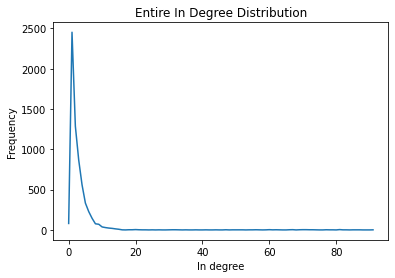

In [23]:
x, y = indeg_freq()
plt.xlabel('In degree')
plt.ylabel('Frequency')
plt.title('Entire In Degree Distribution')
plt.plot(x, y)

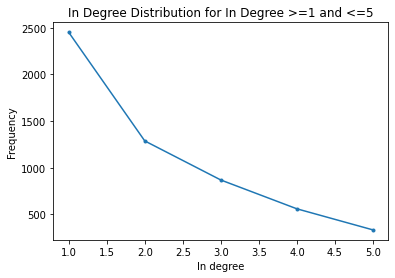

In [24]:
x, y = indeg_freq()
plt.xlabel('In degree')
plt.ylabel('Frequency')
plt.title('In Degree Distribution for In Degree >=1 and <=5')
plt.plot(x[1:6], y[1:6],marker='.')

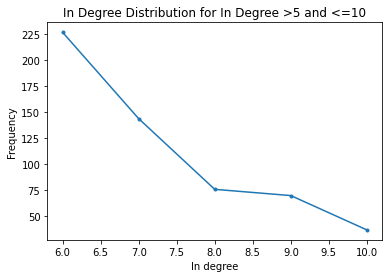

In [25]:
x, y = indeg_freq()
plt.xlabel('In degree')
plt.ylabel('Frequency')
plt.title('In Degree Distribution for In Degree >5 and <=10')
plt.plot(x[6:11], y[6:11],marker='.')

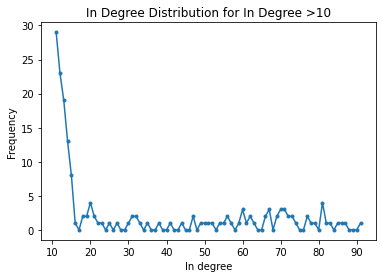

In [26]:
x, y = indeg_freq()
plt.xlabel('In degree')
plt.ylabel('Frequency')
plt.title('In Degree Distribution for In Degree >10')
plt.plot(x[11:], y[11:],marker='.')

**Out Degree Distribution of the Network**

In [28]:
def outdeg_freq():
    x=[i for i in range(0,maxOutDegree+1)]
    y=[0 for i in range(0,maxOutDegree+1)]
    #storing frequency distribution of in degrees
    for node in graph:
        degOutCount=0
        for i in graph[node]:
            degOutCount+=graph[node][i]
        y[degOutCount]+=1
    return x, y

Showing different plots each which focus on a particular range of in degree frequencies for better representation

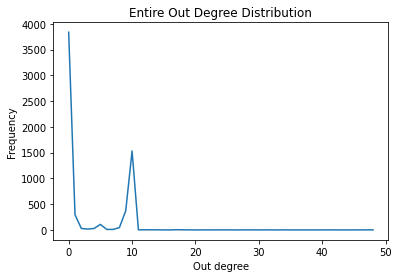

In [28]:
x, y = outdeg_freq()
plt.xlabel('Out degree')
plt.ylabel('Frequency')
plt.title('Entire Out Degree Distribution')
plt.plot(x, y)

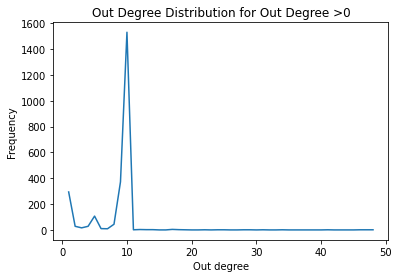

In [29]:
x, y = outdeg_freq()
plt.xlabel('Out degree')
plt.ylabel('Frequency')
plt.title('Out Degree Distribution for Out Degree >0')
plt.plot(x[1:], y[1:])

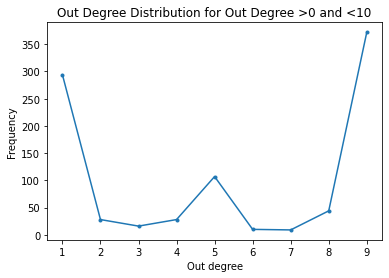

In [30]:
x, y = outdeg_freq()
plt.xlabel('Out degree')
plt.ylabel('Frequency')
plt.title('Out Degree Distribution for Out Degree >0 and <10')
plt.plot(x[1:10], y[1:10],marker='.')

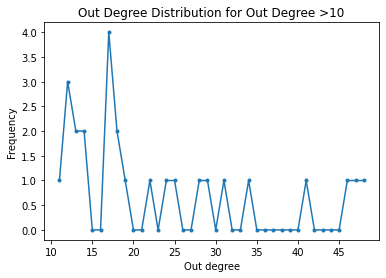

In [31]:
x, y = outdeg_freq()
plt.xlabel('Out degree')
plt.ylabel('Frequency')
plt.title('Out Degree Distribution for Out Degree >10')
plt.plot(x[11:], y[11:],marker='.')

**Local Clustering Coefficient of Nodes**

In [57]:
# less connected nodes have lower lcc values, so nodes with 0 or 1 neighbours are assigned lcc value as 0
# for each node, calculating the local clustering coefficient using the formula
def calcLocalClusteringCoefficient():
    lcc = []
    for node in graph:
        neighbours = []
        for i in range(len(adjmat_undirected)):
            if adjmat_undirected[node][i] == 1:
                neighbours.append(i)
        Kv = len(neighbours)
        Nv = 0
        for neighbour1 in neighbours:
            for neighbour2 in neighbours:
                if adjmat_undirected[neighbour1][neighbour2] == 1 or adjmat_undirected[neighbour2][neighbour1] == 1:
                    Nv += 1
        if Kv == 0 or Kv == 1:
            lcc.append(0)     
        else:
            lcc.append(Nv / (Kv * (Kv - 1)))       
    return lcc

lcc = calcLocalClusteringCoefficient()

Average Clustering Coefficient

In [58]:
sum(lcc) / len(lcc)

0.010867921935819955

This matches the value given in the dataset properties: 0.0109 

**Clustering Coefficient Distribution**

Plot of clustering coefficients of all nodes

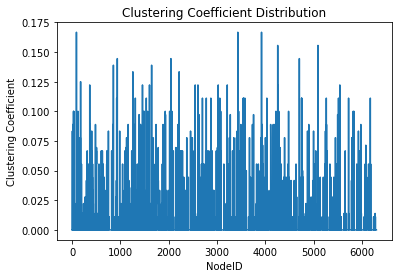

In [34]:
plt.xlabel('NodeID')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient Distribution')
nodes = [node for node in graph]
plt.plot(nodes, lcc)

Plot of frequency of clustering coefficients in various buckets

In [41]:
# finding number of nodes with clustering coefficient values in various buckets
buckets = ['0', '0 - 0.02', '0.02 - 0.04', '0.04 - 0.06', '0.06 - 0.08', '0.08 - 0.100', '>= 0.1']
freq = [0 for bucket in buckets]
for val in lcc:
    if val == 0:
        freq[0] += 1
    elif val < 0.02:
        freq[1] += 1
    elif val < 0.04:
        freq[2] += 1
    elif val < 0.06:
        freq[3] += 1
    elif val < 0.08:
        freq[4] += 1
    elif val < 0.100:
        freq[5] += 1
    else:
        freq[6] += 1

<BarContainer object of 7 artists>

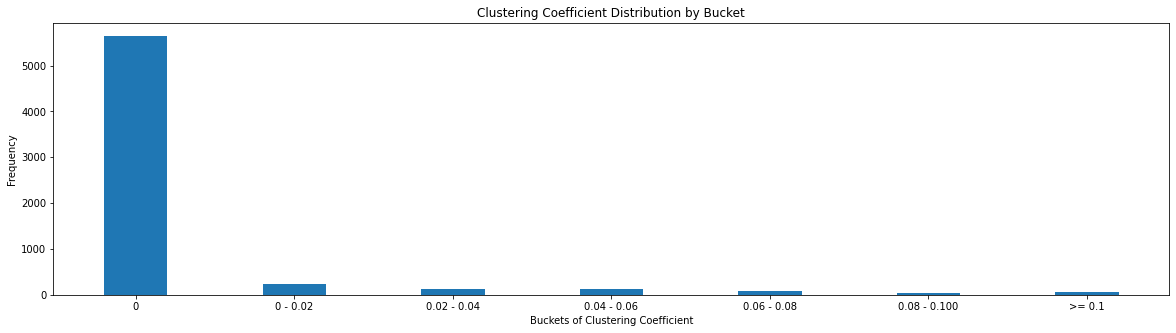

In [42]:
fig = plt.figure(figsize = (20, 5))
plt.xlabel('Buckets of Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution by Bucket')
# plt.plot(buckets, freq)
plt.bar(buckets, freq, width = 0.4)

Plot of frequency of clustering coefficients in various buckets, excluding zero values to visualize remaining values better

In [43]:
# finding number of nodes with clustering coefficient values in various buckets
buckets = ['0 - 0.02', '0.02 - 0.04', '0.04 - 0.06', '0.06 - 0.08', '0.08 - 0.100', '>= 0.1']
freq = [0 for bucket in buckets]
for val in lcc:
    if val == 0:
        continue
    elif val < 0.02:
        freq[0] += 1
    elif val < 0.04:
        freq[1] += 1
    elif val < 0.06:
        freq[2] += 1
    elif val < 0.08:
        freq[3] += 1
    elif val < 0.100:
        freq[4] += 1
    else:
        freq[5] += 1

<BarContainer object of 6 artists>

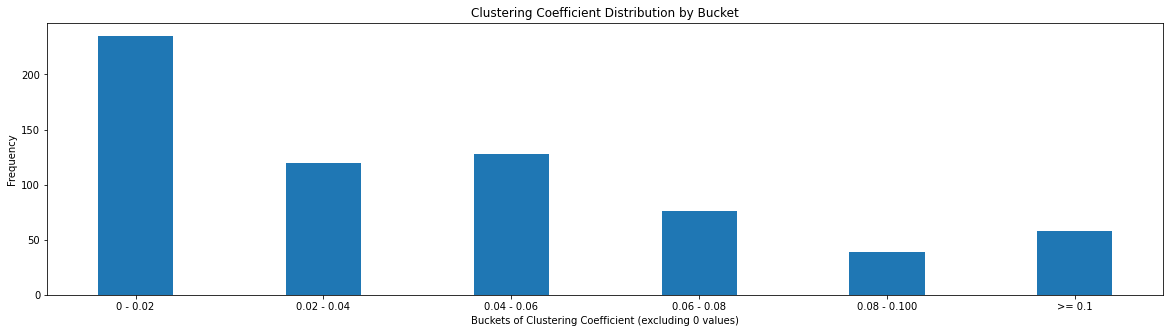

In [44]:
fig = plt.figure(figsize = (20, 5))
plt.xlabel('Buckets of Clustering Coefficient (excluding 0 values)')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution by Bucket')
# plt.plot(buckets, freq)
plt.bar(buckets, freq, width = 0.4)

In [45]:
# calculating out degrees of each node
def calc_outdeg():
    outdeg = []
    for node in graph:
        degOutCount=0
        for i in graph[node]:
            degOutCount += graph[node][i]
        outdeg.append(degOutCount)
    return outdeg

# calculating in degrees of each node
def calc_indeg():
    indeg = []
    for node in graph:
        degInCount=0
        for outNode in graph:
            if node in graph[outNode].keys():
                degInCount += graph[outNode][node]
        indeg.append(degInCount)
    return indeg

outdeg = calc_outdeg()
indeg = calc_indeg()

Plot of clustering coefficient vs out degree

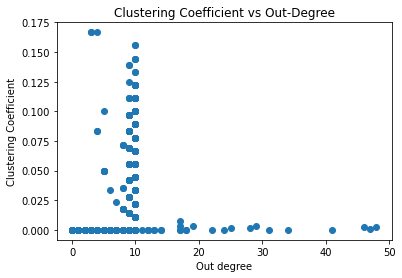

In [46]:
plt.title('Clustering Coefficient vs Out-Degree')
plt.xlabel('Out degree')
plt.ylabel('Clustering Coefficient')
plt.scatter(outdeg, lcc)
plt.show()

Plot of clustering coefficient vs in degree

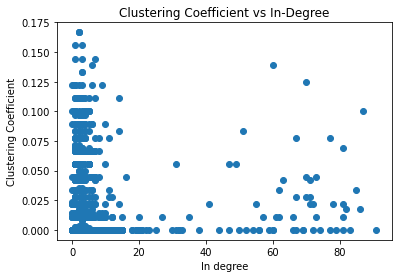

In [47]:
plt.title('Clustering Coefficient vs In-Degree')
plt.xlabel('In degree')
plt.ylabel('Clustering Coefficient')
plt.scatter(indeg, lcc)
plt.show()

# Page Rank, Hubs and Authority

#Networkx Graph

In [35]:
#Creating a Directed graph in networkx
Graph=nx.DiGraph()
for i in range(len(fromList)):
  Graph.add_edge(fromList[i],toList[i])

#PageRank

In [36]:
#using page rank function to find page rank score for all nodes
pageRanks = nx.pagerank(Graph)

In [37]:
print(pageRanks)

{0: 0.00010061505853980175, 1: 0.00010917398605861922, 2: 0.00017116880733588808, 3: 0.0014181699785875226, 4: 0.0015447615491227767, 5: 0.0018239540797636209, 6: 0.00010917398605861922, 7: 0.0014955078138058, 8: 0.0012606249868507581, 9: 0.001198468540417282, 10: 0.0003107572910744247, 703: 0.00026635801039895314, 826: 0.0002551539465463142, 1097: 0.00030588732120622315, 1287: 0.00028161737494289, 1591: 0.0003929454800259496, 1895: 0.00022052084485795086, 1896: 0.00029326593824984616, 1897: 0.00022052084485795086, 1898: 0.00024070955634483194, 1899: 0.00023283194121715293, 144: 0.0013113363985150358, 258: 0.0002530817948549188, 491: 0.0003604451785972098, 1021: 0.00037049382038905314, 1418: 0.0002431647560001845, 1669: 0.0002865819898218685, 1900: 0.0003321300393876918, 1901: 0.00028865695260892017, 1902: 0.0002312598507767206, 1903: 0.0004772658319815221, 121: 0.001206065426187191, 127: 0.0018568582711618506, 128: 0.0013070645403058926, 179: 0.0012371386168342088, 247: 0.001258019692

#Authority and Hub Score

In [38]:
#using page rank function to find page rank score for all nodes
hubsScore, authorityScore = nx.hits(Graph)

In [39]:
print(authorityScore)

{0: 0.0, 1: 0.00015203887979810892, 2: 0.0007538676999129744, 3: 0.018588239194343922, 4: 0.012476140139730937, 5: 0.016476113958807336, 6: 0.00015203887979810892, 7: 0.011349393317842023, 8: 0.01542467746539042, 9: 0.0105850352880383, 10: 0.0012581011481985155, 703: 1.8676115728878173e-06, 826: 3.560878580327965e-05, 1097: 1.449392606724783e-05, 1287: 2.156179167796135e-06, 1591: 6.097900820467004e-05, 1895: 3.198060073970022e-07, 1896: 6.61817428720592e-05, 1897: 3.198060073970022e-07, 1898: 6.857403512656102e-07, 1899: 8.410444717561833e-07, 144: 0.016239121558457734, 258: 3.042176996332591e-05, 491: 9.857385251940946e-05, 1021: 7.642002512166194e-05, 1418: 3.959012128292265e-05, 1669: 0.00012128121528223198, 1900: 3.131517002787875e-05, 1901: 8.354150764539781e-05, 1902: 2.9565677039932786e-05, 1903: 0.00021023632399941403, 121: 0.013343720318500986, 127: 0.019874039870419406, 128: 0.012113720323600214, 179: 0.0161212073497934, 247: 0.014864403237541865, 249: 0.020290000606545195, 

In [40]:
print(hubsScore)

{0: 0.0014846327801683302, 1: 0.0, 2: 0.0, 3: 3.1228491192963023e-06, 4: 0.00028870360896923904, 5: 0.0026073101209297643, 6: 0.0, 7: 0.0013825856712709028, 8: 8.35594252674096e-06, 9: 0.0023270408452820295, 10: 0.0, 703: 8.033917828094697e-07, 826: 0.0, 1097: 0.0, 1287: 4.676780759882069e-06, 1591: 0.0, 1895: 3.135616366901479e-08, 1896: 1.5988563218134406e-05, 1897: 0.0, 1898: 0.0, 1899: 0.0, 144: 0.00239245194412444, 258: 0.0, 491: 0.0, 1021: 0.0, 1418: 0.0, 1669: 4.198376218783733e-06, 1900: 0.0, 1901: 0.0, 1902: 0.0, 1903: 0.0, 121: 0.0, 127: 0.0016069776384634723, 128: 0.0, 179: 0.001683933471603803, 247: 1.4437480828454706e-06, 249: 0.0008737393203349936, 264: 0.00043157176277379866, 353: 0.002780534952732758, 424: 7.084534114103027e-07, 426: 0.0, 145: 0.001766918458162248, 176: 0.0009741637711600776, 177: 0.002579008635528683, 753: 0.0024281569208537083, 754: 0.0, 762: 0.0024572984044399864, 2064: 0.0, 3002: 0.0, 520: 0.0, 665: 0.0022198269633445645, 852: 0.00012618386910259066

##Comparison of PageRank, Authority Score and Hub Score

PageRank computes a ranking of nodes in the graph based on the structure of the incoming links, while the HITS algorithm computes the authority score for a node based on the incoming links and the hub score based on outgoing links.

In [41]:
ranking_by_pagerank = sorted(pageRanks, key=pageRanks.get, reverse=True)

In [42]:
ranking_by_authorityscore = sorted(authorityScore, key=authorityScore.get, reverse=True)

In [43]:
ranking_by_hubsscore = sorted(hubsScore, key=hubsScore.get, reverse=True)

---

Top 10 nodes by PageRank

In [57]:
ranking_by_pagerank[:10]

[367, 249, 145, 264, 266, 123, 127, 122, 1317, 5]

Top 10 nodes by authority score

In [58]:
ranking_by_authorityscore[:10]

[367, 249, 123, 127, 266, 264, 145, 251, 427, 3]

Top 10 nodes by hub score

In [59]:
ranking_by_hubsscore[:10]

[3459, 366, 36, 2374, 3693, 2020, 1884, 1739, 3551, 5724]

---

Average out degree of top 50 nodes by PageRank

In [60]:
avg_outdeg(ranking_by_pagerank[:50])

0.06697349627043327

Average out degree of top 50 nodes by Authority Score

In [61]:
avg_outdeg(ranking_by_authorityscore[:50])

0.06871925091255356

Average out degree of top 50 nodes by Hub Score

In [62]:
avg_outdeg(ranking_by_hubsscore[:50])

0.07935248373274084

---

Average in degree of top 50 nodes by PageRank

In [63]:
avg_indeg(ranking_by_pagerank[:50])

0.0285668941437867

Average in degree of top 50 nodes by Authority Score

In [64]:
avg_indeg(ranking_by_authorityscore[:50])

0.028725599111252182

Average in degree of top 50 nodes by Hub Score

In [65]:
avg_indeg(ranking_by_hubsscore[:50])

0.0011109347722583717

---

In [45]:
def outdeg_freq_custom(nodes):
    x=[i for i in range(0,maxOutDegree+1)]
    y=[0 for i in range(0,maxOutDegree+1)]
    #storing frequency distribution of in degrees
    for node in nodes:
        degOutCount=0
        for i in graph[node]:
            degOutCount+=graph[node][i]
        y[degOutCount]+=1
    return x, y

Out Degree Distribution of Top 500 nodes by PageRank

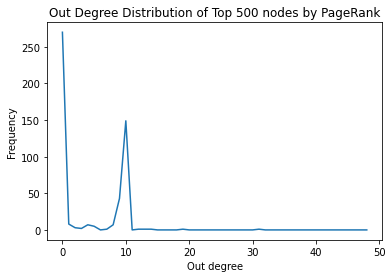

In [50]:
x, y = outdeg_freq_custom(ranking_by_pagerank[:500])
plt.xlabel('Out degree')
plt.ylabel('Frequency')
plt.title('Out Degree Distribution of Top 500 nodes by PageRank')
plt.plot(x, y)

Out Degree Distribution of Top 500 nodes by Authority Score

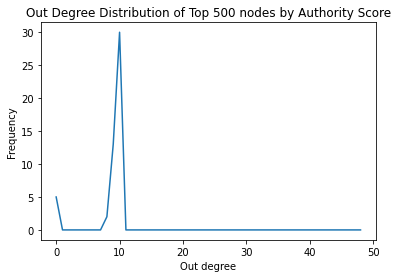

In [48]:
x, y = outdeg_freq_custom(ranking_by_authorityscore[:50])
plt.xlabel('Out degree')
plt.ylabel('Frequency')
plt.title('Out Degree Distribution of Top 500 nodes by Authority Score')
plt.plot(x, y)

Out Degree Distribution of Top 500 nodes by Hub Score

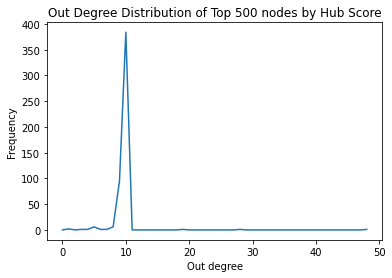

In [69]:
x, y = outdeg_freq_custom(ranking_by_hubsscore[:500])
plt.xlabel('Out degree')
plt.ylabel('Frequency')
plt.title('Out Degree Distribution of Top 500 nodes by Hub Score')
plt.plot(x, y)

---

In [70]:
def indeg_freq_custom(nodes):
    x=[i for i in range(0,maxInDegree+1)]
    y=[0 for i in range(0,maxInDegree+1)]
    #storing frequency distribution of in degrees
    for node in nodes:
        degInCount=0
        for outNode in nodes:
            if node in graph[outNode].keys():
                degInCount+=graph[outNode][node]
        y[degInCount]+=1    
    return x, y

In Degree Distribution of Top 500 nodes by PageRank

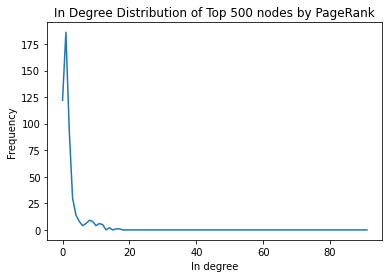

In [71]:
x, y = indeg_freq_custom(ranking_by_pagerank[:500])
plt.xlabel('In degree')
plt.ylabel('Frequency')
plt.title('In Degree Distribution of Top 500 nodes by PageRank')
plt.plot(x, y)

In Degree Distribution of Top 500 nodes by Authority Score

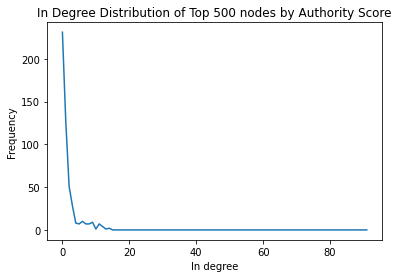

In [72]:
x, y = indeg_freq_custom(ranking_by_authorityscore[:500])
plt.xlabel('In degree')
plt.ylabel('Frequency')
plt.title('In Degree Distribution of Top 500 nodes by Authority Score')
plt.plot(x, y)

In Degree Distribution of Top 500 nodes by Hub Score

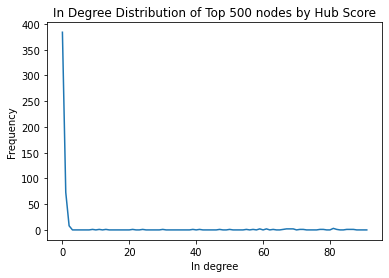

In [73]:
x, y = indeg_freq_custom(ranking_by_hubsscore[:500])
plt.xlabel('In degree')
plt.ylabel('Frequency')
plt.title('In Degree Distribution of Top 500 nodes by Hub Score')
plt.plot(x, y)

---

**Plots of nodes by ranking**

Plot of PageRank of all nodes

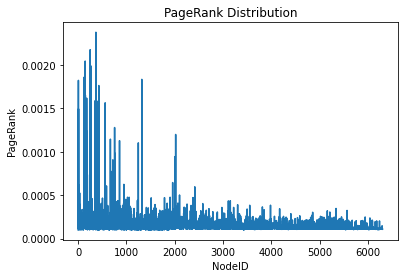

In [74]:
plt.xlabel('NodeID')
plt.ylabel('PageRank')
plt.title('PageRank Distribution')
nodes = [node for node in graph]
pagerank_scores = []
for node in nodes:
    pagerank_scores.append(pageRanks[node])
plt.plot(nodes, pagerank_scores)

Plot of Authority Score of all nodes

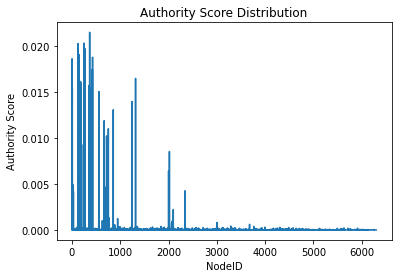

In [75]:
plt.xlabel('NodeID')
plt.ylabel('Authority Score')
plt.title('Authority Score Distribution')
nodes = [node for node in graph]
authority_scores = []
for node in nodes:
    authority_scores.append(authorityScore[node])
plt.plot(nodes, authority_scores)

Plot of Hub Score of all nodes

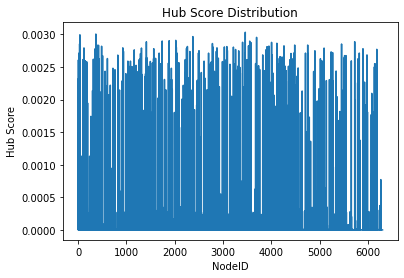

In [76]:
plt.xlabel('NodeID')
plt.ylabel('Hub Score')
plt.title('Hub Score Distribution')
nodes = [node for node in graph]
hub_scores = []
for node in nodes:
    hub_scores.append(hubsScore[node])
plt.plot(nodes, hub_scores)

---

Plot of in degree of nodes by PageRank ranking

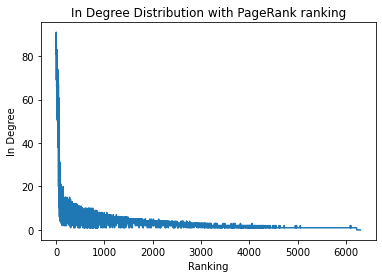

In [77]:
plt.xlabel('Ranking')
plt.ylabel('In Degree')
plt.title('In Degree Distribution with PageRank ranking')
nodes = [node for node in graph]
indeg_scores = []
for node in ranking_by_pagerank:
    indeg_scores.append(indeg[node])
plt.plot(nodes, indeg_scores)

Plot of in degree of nodes by Authority Score ranking

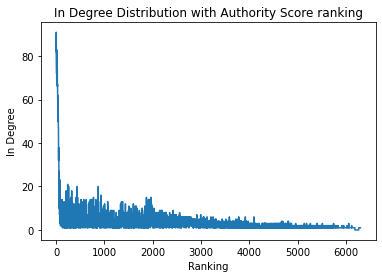

In [78]:
plt.xlabel('Ranking')
plt.ylabel('In Degree')
plt.title('In Degree Distribution with Authority Score ranking')
nodes = [node for node in graph]
indeg_scores = []
for node in ranking_by_authorityscore:
    indeg_scores.append(indeg[node])
plt.plot(nodes, indeg_scores)

Plot of out degree of nodes by Hub Score ranking

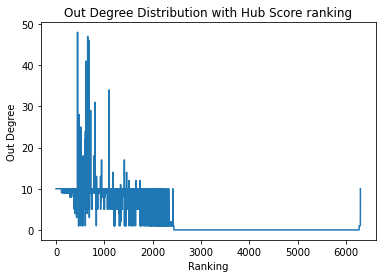

In [79]:
plt.xlabel('Ranking')
plt.ylabel('Out Degree')
plt.title('Out Degree Distribution with Hub Score ranking')
nodes = [node for node in graph]
outdeg_scores = []
for node in ranking_by_hubsscore:
    outdeg_scores.append(outdeg[node])
plt.plot(nodes, outdeg_scores)

---

Plot of PageRank vs Out Degree


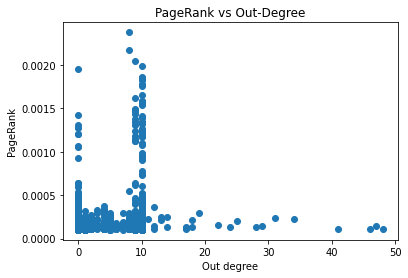

In [80]:
plt.title('PageRank vs Out-Degree')
plt.xlabel('Out degree')
plt.ylabel('PageRank')
plt.scatter(outdeg, pagerank_scores)
plt.show()

Plot of Authority Score vs Out Degree

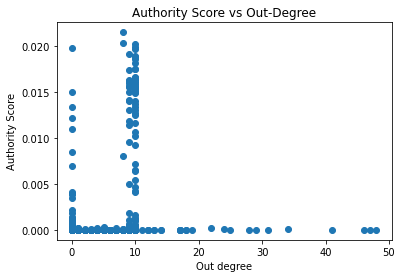

In [81]:
plt.title('Authority Score vs Out-Degree')
plt.xlabel('Out degree')
plt.ylabel('Authority Score')
plt.scatter(outdeg, authority_scores)
plt.show()

Plot of Hub Score vs Out Degree

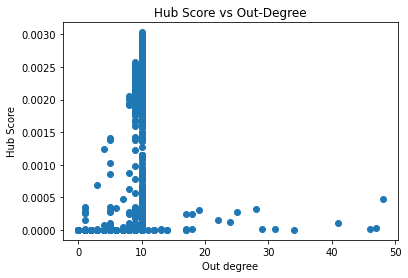

In [82]:
plt.title('Hub Score vs Out-Degree')
plt.xlabel('Out degree')
plt.ylabel('Hub Score')
plt.scatter(outdeg, hub_scores)
plt.show()

---

Plot of PageRank vs In Degree

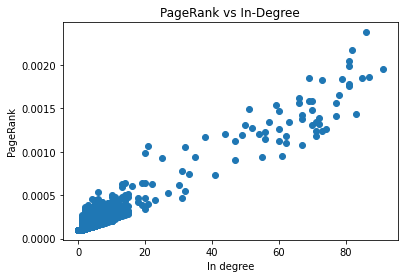

In [83]:
plt.title('PageRank vs In-Degree')
plt.xlabel('In degree')
plt.ylabel('PageRank')
plt.scatter(indeg, pagerank_scores)
plt.show()

Plot of Authority Score vs In Degree

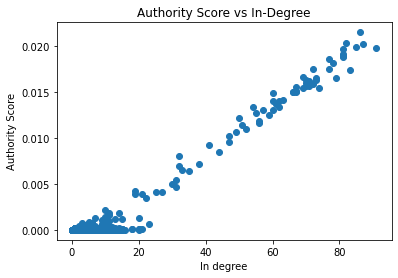

In [84]:
plt.title('Authority Score vs In-Degree')
plt.xlabel('In degree')
plt.ylabel('Authority Score')
plt.scatter(indeg, authority_scores)
plt.show()

Plot of Hub Score vs In Degree

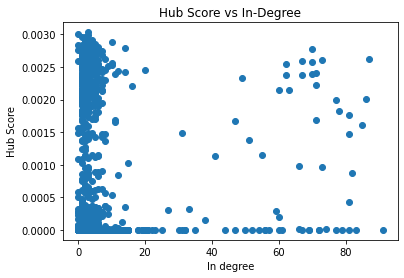

In [85]:
plt.title('Hub Score vs In-Degree')
plt.xlabel('In degree')
plt.ylabel('Hub Score')
plt.scatter(indeg, hub_scores)
plt.show()